# Aufgabe 4.0

In [586]:
import pandas as pd

# 0 - load data
path_erwerb = "../data/census/soziodemo_zip/Neu_Bevoelkerung_nach_Erwerbsstatus_2011_V1_28Mai2013.csv"
df_with_subtotals = pd.read_csv(path_erwerb, sep=";")
df = df_with_subtotals[df_with_subtotals["KREIS"] != "Gesamt"] # create copy without subtotals

#1
result_1 = df.groupby("LAND")["ERWERBST"]\
.agg(np.sum).sort_values(ascending=False)[:1]
print("Aufgabe 1:\n{} hat die meisten Erwerbstätigen: {}\n".format(result_1.index[0], result_1.values[0]))

#2
df.loc[df.ERW18 == "/", "ERW18"] = 0 # replace '/' with 0
result_2 = \
df.groupby("LAND")[["ERW18", "BEV"]]\
.agg(lambda x: np.sum(pd.to_numeric(x)))\
.apply(lambda row: float(row["ERW18"]) / row["BEV"], axis=1)
print("Aufgabe 2:\nRelativer Anteil der Erwerbstätigen unter 18 pro Bundesland:\n{}\n".format(result_2))

#3
result_3 = \
df.groupby("LAND")["ERW18"]\
.agg(lambda x: np.var(pd.to_numeric(x)))\
.sort_values(ascending=False)[:1]
print("Aufgabe 3:\n{} ist das Bundesland mit der höchsten Varianz der Erwerbstätigen unter 18: {}\n"\
     .format(result_3.index[0], result_3.values[0]))

#4
df.loc[:, "ERW18byBEV"] = df.apply(lambda row: pd.to_numeric(row["ERW18"]) / float(row["BEV"]), axis=1) # 
result_4 = \
df.groupby("LAND")["ERW18byBEV"]\
.agg(np.ptp) # ptp = "peak to peak"
print("Aufgabe 4:\nSpanne der Anteile der Erwerbstätigen unter 18:\n{}".format(result_4))

Aufgabe 1:
Nordrhein-Westfalen hat die meisten Erwerbstätigen: 8418180

Aufgabe 2:
Relativer Anteil der Erwerbstätigen unter 18 pro Bundesland:
LAND
Baden-Württemberg         0.007678
Bayern                    0.007828
Berlin                    0.002465
Brandenburg               0.001898
Bremen                    0.003261
Hamburg                   0.003892
Hessen                    0.005385
Mecklenburg-Vorpommern    0.000000
Niedersachsen             0.005343
Nordrhein-Westfalen       0.003676
Rheinland-Pfalz           0.005757
Saarland                  0.004318
Sachsen                   0.002791
Sachsen-Anhalt            0.001513
Schleswig-Holstein        0.005865
Thüringen                 0.000612
dtype: float64

Aufgabe 3:
Baden-Württemberg ist das Bundesland mit der höchsten Varianz der Erwerbstätigen unter 18: 1299094.42149

Aufgabe 4:
Spanne der Anteile der Erwerbstätigen unter 18:
LAND
Baden-Württemberg         0.013621
Bayern                    0.014786
Berlin                  

# Aufgabe 4.1

Aufgabe 2:
Die Top 10 Länder mit der größten prozentualen Spanne:
LAND
Brandenburg               0.075265
Thüringen                 0.066930
Sachsen-Anhalt            0.065303
Mecklenburg-Vorpommern    0.058686
Sachsen                   0.057851
Saarland                  0.054837
Rheinland-Pfalz           0.049844
Schleswig-Holstein        0.049187
Niedersachsen             0.046233
Baden-Württemberg         0.042557
dtype: float64


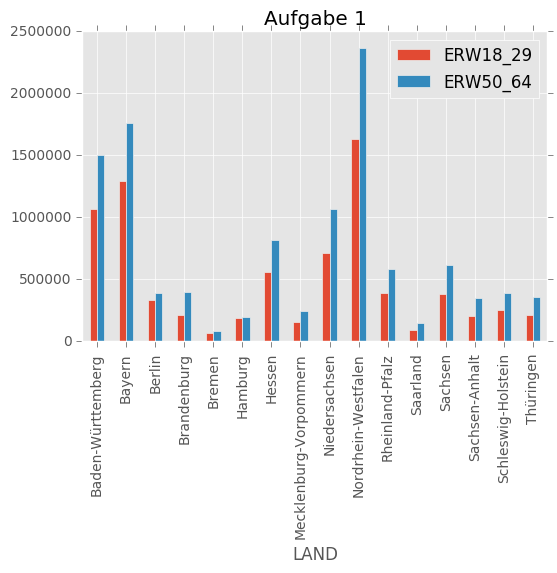

In [633]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use("ggplot")

#1
result_1 = df.groupby("LAND")[["ERW18_29", "ERW50_64"]].agg(np.sum)
fig, axes = plt.subplots(1,1)
result_1.plot(kind="bar", ax=axes, title="Aufgabe 1")
fig.show()

#2
result_2 = df.groupby("LAND")[["ERW18_29", "ERW50_64", "BEV"]]\
.agg(np.sum).apply(lambda row: np.fabs(row["ERW18_29"] - row["ERW50_64"])/row["BEV"], axis=1)\
.sort_values(ascending=False)[:10,]
print("Aufgabe 2:\nDie Top 10 Länder mit der größten prozentualen Spanne:\n{}".format(result_2))


---
# Additional Resources

## How to address cells in a DataFrame

In [228]:
ind = ["ROW via INDEX", "ROW via POSITION"]
data = {\
       "COL via LABEL" : [".loc or .ix", ".ix if LABEL != INT"],\
       "COL via POSITION" : [".ix", ".iloc or .ix if LABEL != INT"]}
pd.DataFrame(data, ind)

,COL via LABEL,COL via POSITION
ROW via INDEX,.loc or .ix,.ix
ROW via POSITION,.ix if LABEL != INT,.iloc or .ix if LABEL != INT


## Pandas essentials
* http://tomaugspurger.github.io/modern-1.html
* http://tomaugspurger.github.io/method-chaining.html
* http://tomaugspurger.github.io/modern-3-indexes.html
* http://tomaugspurger.github.io/modern-4-performance.html
* http://tomaugspurger.github.io/modern-5-tidy.html
* http://tomaugspurger.github.io/modern-6-visualization.html
* http://tomaugspurger.github.io/modern-7-timeseries.html